In [1]:
import  networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

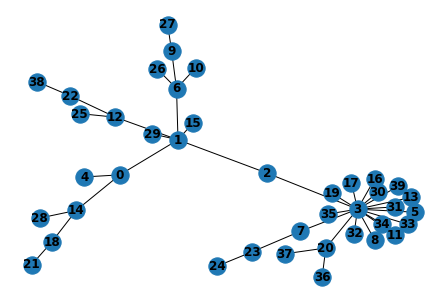

In [2]:
# G = nx.Graph()
# er = nx.erdos_renyi_graph(100, 0.15)
# ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(40, 1)
# red = nx.random_lobster(20, 0.5, 0.9)
nx.draw(ba, with_labels=True, font_weight='bold')
nx.draw(ba,pos=nx.spring_layout(ba), with_labels=True, font_weight='bold')
plt.show()

In [3]:
# print(nx.average_degree_connectivity(ba))
# print(nx.number_of_edges(ba))
# print(nx.degree(ba))

SRV_CMP_PWR = 1000
SRV_LINK_CAP = 100
RUT_LINK_CAP = 200

# Iterate over end nodes:
for v in nx.degree(ba):

        #if node connects only to one neighbour
    if v[1] == 1:

        #mark as endpoint:
        ba.nodes[v[0]]['type'] = 'Endpoint'
        # print('node number: ', v[0])
        # print(ba.nodes[v[0]])

        #add maximum capacity of connection
        adj = list(nx.neighbors(ba, v[0]))
        # print(adj)
        ba[v[0]][adj[0]]['capacity'] = 100
        #--print(ba[v[0]][adj[0]])
    # elif 1<=v[1]<=4:
    #     print('aa')

        #if node has more connection choose whether is Server or router
    else:
        ba.nodes[v[0]]['type'] = 'Router' if v[0] % 2 == 0 else 'Server'
        # print('node number: ', v[0])
        # print(ba.nodes[v[0]])
        adj = list(nx.neighbors(ba, v[0]))
        for neig in adj:
            if ba.nodes[v[0]]['type'] == 'Router':
                ba[v[0]][neig]['capacity'] = RUT_LINK_CAP
                # print(node)
            if ba.nodes[v[0]]['type'] == 'Server':
                ba[v[0]][neig]['capacity'] = SRV_LINK_CAP
                # print(node)

    #--print('node number: ', v[0])
    # print(ba.nodes[v[0]])
    #--for neig in adj:
        #--print('for link:' ,v[0],' ',neig,'attributes:', ba[v[0]][neig])



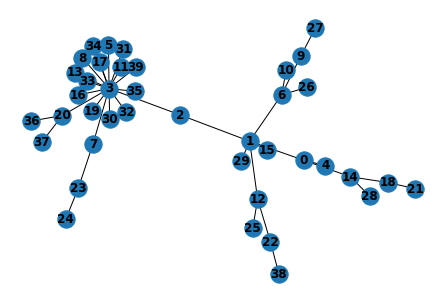

In [4]:
nx.draw(ba,pos=nx.spring_layout(ba), with_labels=True, font_weight='bold')
plt.show()

In [7]:
data = pd.read_csv("Dane.csv", delimiter=",", header=0)
#print (data)

FileNotFoundError: File b'Dane.csv' does not exist

In [2]:
# data cleaning
data["To"] = data["To"].str.strip()
data["From"] = data["From"].str.strip()
#print (data)

In [3]:
#new links 
for i in range(len(data)):
    data.loc[len(data)] = [data['To'][i], data['From'][i], data['Cost'][i], data['Cap'][i]]
#print (data)

In [4]:
# LabelEncoder -> changes categorical data into numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = data['To'].tolist()    #pone los datos de To en el vector labels
labels = labels + data['From'].tolist() #anade los datos de From en un vector
labels = list(set(labels)) #elimina los datos repetidos
#print (labels)
le.fit(labels)   #indexar nodos
data['From_edge'] = le.transform(data['From'])+1 #guardar indices
data['To_edge'] = le.transform(data['To'])+1     #guardar indices
#print (data['From_edge'])
Vn=0
for i in range(len(data)): 
    if Vn <= data['To_edge'][i]:
        Vn = data['To_edge'][i]
    if Vn <= data['From_edge'][i]:
        Vn = data['From_edge'][i]    
#print (Vn)

In [5]:
data['route_id'] = data.index+1
En=0
for i in range(len(data)): 
    if En <= data['route_id'][i]:
        En = data['route_id'][i]
#print (En)

In [6]:
# add route_id
for i, z in enumerate(list(set((data['From'] + data['To']).tolist()))):
    data.loc[(data['From'] == z[:3]) & (data['To'] == z[3:]), ['route_id']] = i   

In [7]:
data.head(len(data))

,From,To,Cost,Cap,From_edge,To_edge,route_id
0,user1-1,node1,5,6,14,6,1
1,user2-1,node1,5,6,19,6,2
2,user3-1,node1,5,6,24,6,3
3,user4-1,node1,5,6,29,6,4
4,user1-2,node2,5,6,15,7,5
5,user2-2,node2,5,6,20,7,6
6,user3-2,node2,5,6,25,7,7
7,user4-2,node2,5,6,30,7,8
8,user1-3,node3,5,6,16,8,9
9,user2-3,node3,5,6,21,8,10


In [8]:
with open("data.dat", "a") as f:
    f.write("""
data;

param Vn := {Vn};
param En := {En};
param Dn := {Dn};

param : h  s  t :=
 1      {h} {s} {t}
;
        """.format(Vn=Vn, En=En, Dn=1, h=1, s=1, t=5))

In [9]:
with open("data.dat", "a") as f:
    f.write("""
param : A :=
""")

    for i in range(En):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['route_id'][i], From_edge_number=data['From_edge'][i]))
    f.write(""";""")

In [10]:
with open("data.dat", "a") as f:
    f.write("""

param : B :=
""")
        
    for i in range(En):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['route_id'][i], to_edge_number=data['To_edge'][i]))
    f.write(""";""")

In [11]:
with open("data.dat", "a") as f:
    f.write("""
     
param : K :=
""")
    for i in range(En):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['route_id'][i], cost=data['Cost'][i]))

In [12]:
with open("data.dat", "a") as f:
     f.write("""
;
end;
""")